In [1]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj7.csv')

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

1712

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0       Massive Attack           1140
1          The Prodigy            692
2      Leslie Odom Jr.            502
3                 TOOL            430
4   Lin-Manuel Miranda            340
5            Metallica            335
6             Slipknot            294
7                IDLES            257
8                Ghost            169
9  Christopher Jackson            165

<AxesSubplot:ylabel='Artist'>

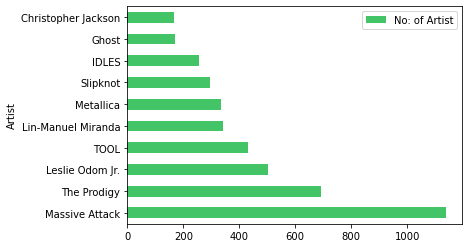

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [5]:
df1_list = df1['Artist'].head(10).tolist()

In [6]:
print(df1_list)

['Massive Attack', 'The Prodigy', 'Leslie Odom Jr.', 'TOOL', 'Lin-Manuel Miranda', 'Metallica', 'Slipknot', 'IDLES', 'Ghost', 'Christopher Jackson']


In [7]:
import numpy as np
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['Out Of Space (Remastered)', 'Out Of Space (Remastered)', 'Need Some1', 'You’ll Be UNDER MY WHEELS', 'Serial Thrilla', 'Voodoo People (Remastered)', 'Stand Up', 'Spitfire', 'Firestarter', 'Light Up the Sky', 'Diesel Power', 'Wind It Up (Remastered)', 'Mescaline', 'Timebomb Zone', "Baby's Got a Temper (Main Mix)", "Warrior's Dance", 'Ibiza', '3 Kilos (Remastered)', 'Smack My Bitch Up', 'Destroy', 'We Live Forever', 'We Live Forever', 'No Good (Start the Dance) [Remastered]', 'You’ll Be UNDER MY WHEELS', 'Light Up the Sky', 'Omen', "Shut 'Em Up", "World's on Fire", 'Run with the Wolves', 'Rok-Weiler', 'Mindfields', 'Breathe', 'Need Some1', 'Out Of Space (Remastered)', 'Colours', 'The Day Is My Enemy', 'Break & Enter (Remastered)', 'Music Reach (1,2,3,4)', 'Fire (Sunrise Version)', 'Diesel Power', 'Roadblox', 'Invaders Must Die', 'Nasty', 'Stand Up', 'Hotride', 'Poison (Remastered)', 'Voodoo People (Remastered)', "Baby's Got a Temper (Main Mix)", 'No Tourists', 'No Good (Start the Dance)

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
from tqdm import tqdm
id_list=[]
for i in tqdm(track_list):

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

100%|██████████| 11984/11984 [50:54<00:00,  3.92it/s] 


['06JFWvy39Mx49I5Yh34Ifg', '06JFWvy39Mx49I5Yh34Ifg', '096XPlwrRCdsfbnZz3MQQQ', '3vc1sGOGAVxhx8S1kERqyn', '41dRg8nPgm974fD7sf9wvl', '1B0tHf7EuEXeKLkT2gvVBz', '147ximWPJObFNQ4M1AhFox', '65m3XlmjBPioRtWxmdyIDB', '79CUrU5o2KAVDTNm4x3eGU', '7GpgT7sHaTg9nHUM8g888k', '2zKT0JYK2Ap1YgWMXoibnP', '42ZnSREm8Dzj850zTOz3GX', '41B9qrMIvr1hkJiRw7781R', '2sifRHahNmhTR7a3BjKc9u', '3uQ4QuEuqy47UW85DpkmCZ', '4OYhOYnrwWDNlOByAdPAHM', '1h9P5WJwyvK8OB7O2YiXgp', '0OgvOesThIFFpc0366gCfV', '48vDCZIRmrFO33fH4QU4ij', '1pduTu9RLjOUFz9szYKn0E', '0o3Ki1kUWyoF2XVtDBRNqk', '0o3Ki1kUWyoF2XVtDBRNqk', '7nZsFPusGKsY8biJ9nWCSB', '3vc1sGOGAVxhx8S1kERqyn', '7GpgT7sHaTg9nHUM8g888k', '144adL7pGHEWRwute2wxzZ', '2JCfiNog8XQIOHFcxZoRo6', '6qm8oiSOfaPRDLmcoKfpmW', '5qTixEL6DIvXM7PY5MFRgT', '5TFfKIjipFrTMBKca4UMvF', '2N9HhkmQe0uhp4Pp76x4l3', '02dCAjFWoK40DJG3cDWcED', '096XPlwrRCdsfbnZz3MQQQ', '06JFWvy39Mx49I5Yh34Ifg', '4cGPfZv4bRv7lWWQwT8g0k', '5n9FldVgKYX5maCkjXzE57', '1KpJbzg9tJJ24MGIx1fBST', '7yQGrQD24cq4KL7t1LXujx', '7rpIQ9kIrv

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

11977


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 11977/11977 [29:08<00:00,  6.85it/s] 


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  06JFWvy39Mx49I5Yh34Ifg   0.960     0.111  147.074       0.0608   
1  06JFWvy39Mx49I5Yh34Ifg   0.960     0.111  147.074       0.0608   
2  096XPlwrRCdsfbnZz3MQQQ   0.988     0.429  184.076       0.0978   
3  3vc1sGOGAVxhx8S1kERqyn   0.944     0.321  114.015       0.0761   
4  41dRg8nPgm974fD7sf9wvl   0.989     0.888  117.695       0.1660   

   acousticness  instrumentalness  time_signature  danceability  key  \
0       0.00149             0.285               4         0.642    9   
1       0.00149             0.285               4         0.642    9   
2       0.05170             0.552               4         0.398    2   
3       0.01020             0.900               4         0.672    4   
4       0.02590             0.549               4         0.498   10   

   duration_ms  loudness  valence  mode                             track_uri  
0       298533    -5.115   0.5970     1  spotify:track:06JFWvy39Mx49I5Yh34Ifg  
1       298533    -5.115   0.5970     1  spotify:track:06JFWvy39Mx49I5Yh34Ifg  
2       162895    -7.556   0.0961     1  spotify:track:096XPlwrRCdsfbnZz3MQQQ  
3       236973    -5.214   0.3820     0  spotify:track:3vc1sGOGAVxhx8S1kERqyn  
4       311333    -5.635   0.0892     0  spotify:track:41dRg8nPgm974fD7sf9wvl

In [20]:
audioFeaturesDF_AllTracks.shape

(11977, 15)

In [21]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [22]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [23]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   06JFWvy39Mx49I5Yh34Ifg   0.960    0.1110  147.074       0.0608   
1   06JFWvy39Mx49I5Yh34Ifg   0.960    0.1110  147.074       0.0608   
2   096XPlwrRCdsfbnZz3MQQQ   0.988    0.4290  184.076       0.0978   
3   3vc1sGOGAVxhx8S1kERqyn   0.944    0.3210  114.015       0.0761   
4   41dRg8nPgm974fD7sf9wvl   0.989    0.8880  117.695       0.1660   
5   1B0tHf7EuEXeKLkT2gvVBz   0.998    0.3020  149.007       0.0651   
6   147ximWPJObFNQ4M1AhFox   0.900    0.2670  125.007       0.0611   
7   65m3XlmjBPioRtWxmdyIDB   0.924    0.0352  119.089       0.0412   
8   79CUrU5o2KAVDTNm4x3eGU   0.948    0.2260  141.507       0.0779   
9   7GpgT7sHaTg9nHUM8g888k   0.951    0.3120  159.872       0.1220   
10  2zKT0JYK2Ap1YgWMXoibnP   0.877    0.0900  105.921       0.0646   
11  42ZnSREm8Dzj850zTOz3GX   0.945    0.0766  144.980       0.0500   
12  41B9qrMIvr1hkJiRw7781R   0.964    0.6490  137.069       0.3060   
13  2sifRHahNmhTR7a3BjKc9u   0.898    0.1020  130.016       0.0409   
14  3uQ4QuEuqy47UW85DpkmCZ   0.952    0.3380  105.957       0.0465   
15  4OYhOYnrwWDNlOByAdPAHM   0.989    0.7300  137.015       0.1350   
16  1h9P5WJwyvK8OB7O2YiXgp   0.710    0.1080  192.068       0.3350   
17  0OgvOesThIFFpc0366gCfV   0.892    0.3650  119.000       0.0386   
18  48vDCZIRmrFO33fH4QU4ij   0.995    0.1090  136.216       0.1640   
19  1pduTu9RLjOUFz9szYKn0E   0.415    0.0734  119.867       0.0320   

    acousticness  instrumentalness  time_signature  danceability  key  \
0       0.001490          0.285000               4         0.642    9   
1       0.001490          0.285000               4         0.642    9   
2       0.051700          0.552000               4         0.398    2   
3       0.010200          0.900000               4         0.672    4   
4       0.025900          0.549000               4         0.498   10   
5       0.001370          0.440000               4         0.668    6   
6       0.006460          0.000000               4         0.584    4   
7       0.000917          0.583000               4         0.563    2   
8       0.003350          0.364000               4         0.545   11   
9       0.001680          0.783000               5         0.198    1   
10      0.068000          0.000036               4         0.725    0   
11      0.001040          0.598000               4         0.568    1   
12      0.005670          0.852000               4         0.326    2   
13      0.000328          0.796000               4         0.524    7   
14      0.000495          0.045100               4         0.567    6   
15      0.012800          0.794000               4         0.579    5   
16      0.250000          0.000000               4         0.690    5   
17      0.077800          0.631000               4         0.697    7   
18      0.003060          0.626000               4         0.604   10   
19      0.057800          0.084600               4         0.268    5   

    duration_ms  loudness  valence  mode                             track_uri  
0        298533    -5.115   0.5970     1  spotify:track:06JFWvy39Mx49I5Yh34Ifg  
1        298533    -5.115   0.5970     1  spotify:track:06JFWvy39Mx49I5Yh34Ifg  
2        162895    -7.556   0.0961     1  spotify:track:096XPlwrRCdsfbnZz3MQQQ  
3        236973    -5.214   0.3820     0  spotify:track:3vc1sGOGAVxhx8S1kERqyn  
4        311333    -5.635   0.0892     0  spotify:track:41dRg8nPgm974fD7sf9wvl  
5        387067    -5.873   0.3510     0  spotify:track:1B0tHf7EuEXeKLkT2gvVBz  
6        175093    -3.637   0.8930     1  spotify:track:147ximWPJObFNQ4M1AhFox  
7        307800    -2.703   0.2600     1  spotify:track:65m3XlmjBPioRtWxmdyIDB  
8        279800    -5.098   0.3550     1  spotify:track:79CUrU5o2KAVDTNm4x3eGU  
9        199716    -5.786   0.3260     1  spotify:track:7GpgT7sHaTg9nHUM8g888k  
10       257600    -3.496   0.0976     1  spotify:track:2zKT0JYK2Ap1YgWMXoibnP  
11       272227    -6.223   0.6980     1 